# Software Evolution - Practical Session
## Laws of software evolution based on code counting
## Academic year 2023-2024

### Write your answers under the questions that are present in this notebook  

#### Note: Print the final output of each cell in this notebook

#### Read the provided description document before proceeding with the following notebook

## 1.  Data preprocessing

To install packages, use :

pip install tqdm  pandas numpy matplotlib scikit-learn

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

### Import dataset

First, import the dataset that contains the total lines of code, total blank lines, total comment lines, total number of files, and release date for each tag.

In [14]:
# WRITE YOUR CODE HERE
df = pd.read_csv('data/LawIncreasingGrowthDataset.csv')
df

,tag,code,blank,comment,nFiles,release_date
0,1.4,48551,8727,11154,419,2009-01-06
1,1.5.0,63240,11018,18457,512,2009-02-18
2,jaunty,70751,11840,19671,578,2009-06-23
3,1.5.1,67939,11618,18131,600,2009-08-05
4,1.5.2,68564,11555,11906,611,2009-08-17
...,...,...,...,...,...,...
56,4.3.1,456159,72232,219480,3405,2016-12-14
57,4.3.1.1,456159,72232,219480,3405,2017-02-02
58,4.4.0,472926,75325,216544,3597,2017-03-07
59,4.4.1,473836,75392,216678,3598,2017-05-08


### Dataset A : Major.Minor.Patch tag format

Filter out non-official releases such as alpha, beta, release candidates, milestones, branches, and unnumbered tags. Additionally, version numbers typically follow a Major.Minor.Patch format, but exceptions exist (e.g., 1.4, 3.3.0.1, 4.3.0.1, or 4.3.1.1). Versions with more than three components are disregarded, and two-component versions are treated as implicit three-component versions (e.g., 1.4 is interpreted as 1.4.0).  

Write a regular expression statement to identify tags following semantic versioning (major.minor.patch) guidelines. You can use the pattern: '^v?[0-9]+\.[0-9]+(\.[0-9]+)?$'  

Once you've applied this regex, print out the selected major.minor.patch dataset.

In [15]:
# WRITE YOUR CODE HERE
df_a = df[df["tag"].str.contains(r'^v?[0-9]+\.[0-9]+(\.[0-9]+)?$')]
df_a

/tmp/nix-shell.dAu2WN/ipykernel_13051/931571578.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_a = df[df["tag"].str.contains(r'^v?[0-9]+\.[0-9]+(\.[0-9]+)?$')]


,tag,code,blank,comment,nFiles,release_date
0,1.4,48551,8727,11154,419,2009-01-06
1,1.5.0,63240,11018,18457,512,2009-02-18
3,1.5.1,67939,11618,18131,600,2009-08-05
4,1.5.2,68564,11555,11906,611,2009-08-17
6,1.6.1,86799,14582,41327,744,2009-11-05
9,2.0.0,115586,18488,42717,1074,2010-06-05
10,2.0.1,115699,18492,42724,1074,2010-07-06
21,3.0.0,188246,29836,60879,1694,2012-02-07
22,3.0.1,189022,29945,61587,1696,2012-03-12
26,3.1.0,191269,29973,62628,1642,2012-06-22


### Dataset B : Major.Minor tag format

Starting from the previous data (**Dataset A**),  for each Major.Minor.Patch tag group, select the earliest version (e.g., for a set of 4.4.0, 4.4.1, and 4.4.2, consider 4.4.0 and rename it to 4.4).

In [16]:
# WRITE YOUR CODE HERE
df_b = df_a.copy()
df_b["tag"] = df_b["tag"].str.replace(r'\.[0-9]$', '', regex=True)
df_b.drop_duplicates(subset="tag", keep="first", inplace=True)
df_b

,tag,code,blank,comment,nFiles,release_date
0,1,48551,8727,11154,419,2009-01-06
1,1.5,63240,11018,18457,512,2009-02-18
6,1.6,86799,14582,41327,744,2009-11-05
9,2.0,115586,18488,42717,1074,2010-06-05
21,3.0,188246,29836,60879,1694,2012-02-07
26,3.1,191269,29973,62628,1642,2012-06-22
29,3.2,257934,43596,119688,2004,2012-12-17
38,3.3,350914,58798,159566,2682,2013-06-20
42,3.4,291555,48371,149981,2367,2013-10-24
45,4.0,357375,57707,159944,2790,2014-05-30


## 2. Law of Increasing Growth

### Software project's metrics

Visualize four plots representing the evolution of a software project's metrics, including the number of lines of code, blank lines, comment lines, and the number of files, as follows:  

1. Plot the metrics against software version numbers:  
   1.1) For version tags of the format major.minor.patch.  
   1.2) For version tags of the format major.minor.  
   Place these plots at positions (0,0) and (0,1) respectively.  
  
2. Plot the metrics against dates:  
   2.1) For version tags of the format major.minor.patch.  
   2.2) For version tags of the format major.minor.  
   Place these plots right below the corresponding version-based plots, at positions (1,0) and (1,1).  

Hint: Ensure proper datetime formatting for the dates in the datasets instead of storing them as strings.

For example, if you're working with a DataFrame:

fig, axes = plt.subplots(2, 2, figsize=(18, 10))  
dataset_a[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 0], legend=True)  
.....  

axes[0, 0].set_xlabel('Major.Minor.Patch versions')  
.....  

plt.tight_layout()  
plt.show()

/tmp/nix-shell.dAu2WN/ipykernel_13051/841458114.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['date'] = pd.to_datetime(df_a['release_date'])


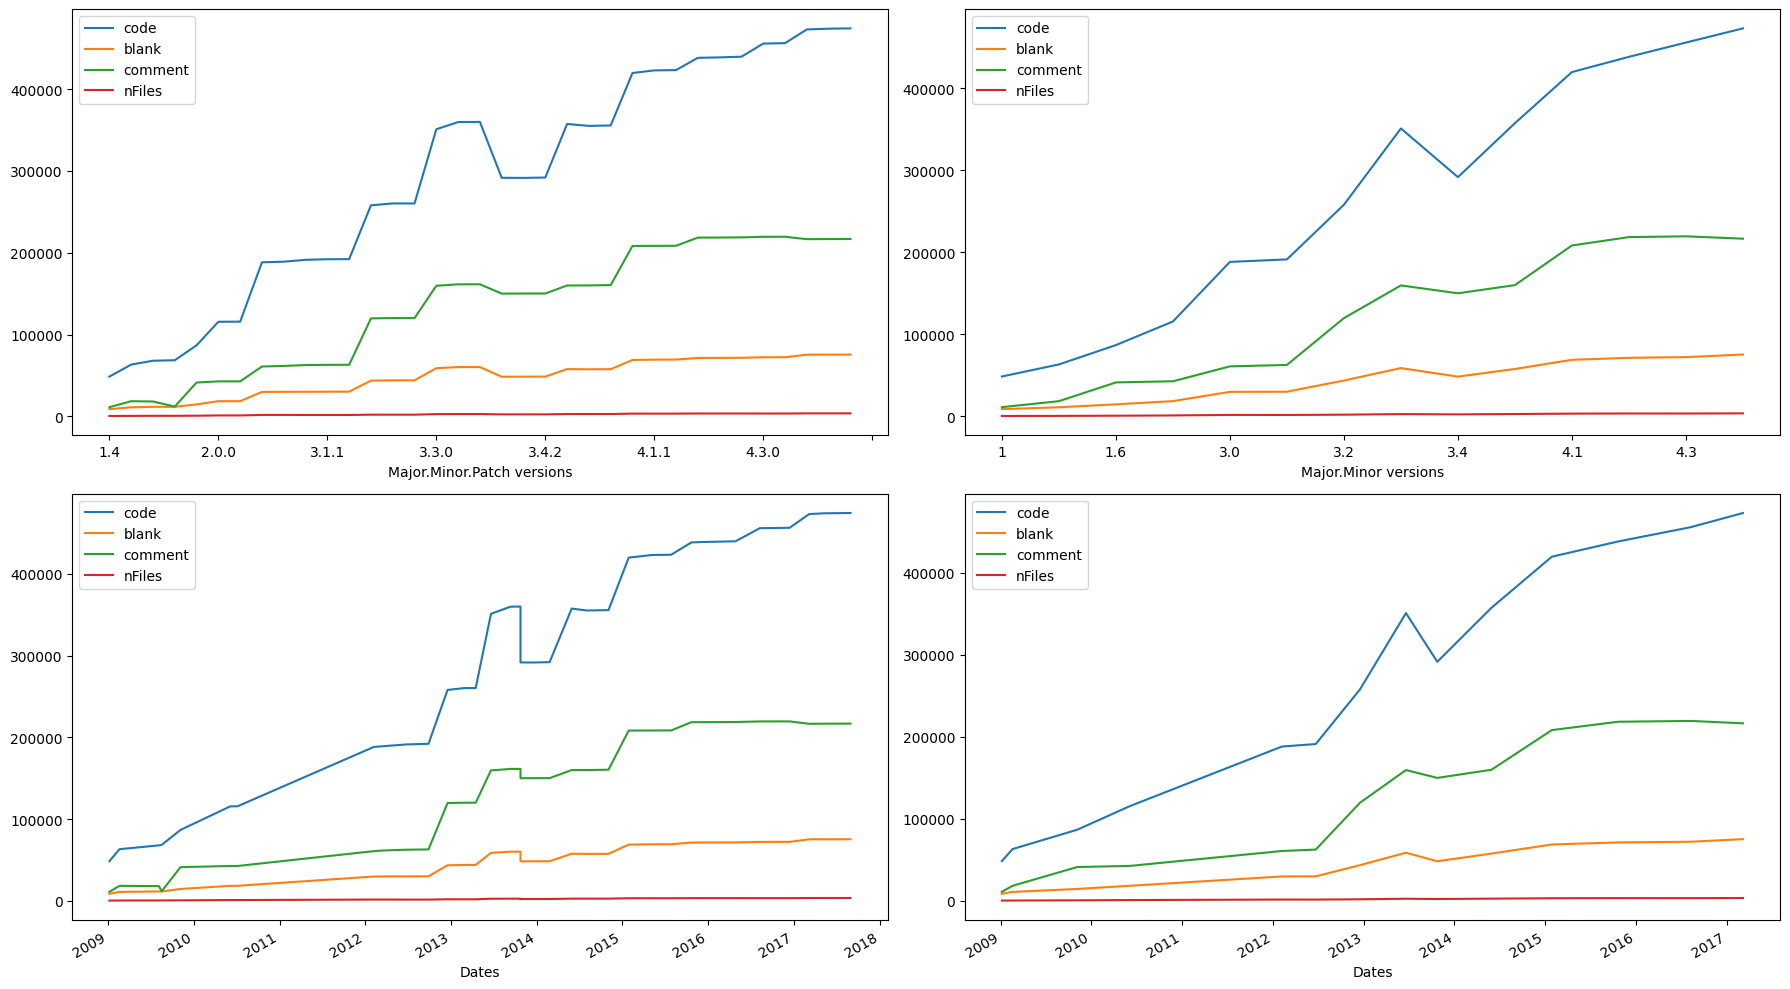

In [17]:
# WRITE YOUR CODE HERE
# Convert 'date' column to datetime
df_a['date'] = pd.to_datetime(df_a['release_date'])
df_b['date'] = pd.to_datetime(df_b['release_date'])

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Plot for major.minor.patch format
df_a[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 0], legend=True)
df_a[['code', 'blank', 'comment', 'nFiles', 'date']].plot(x='date', ax=axes[1, 0], legend=True)

axes[0, 0].set_xlabel('Major.Minor.Patch versions')
axes[1, 0].set_xlabel('Dates')

# Plot for major.minor format
df_b[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 1], legend=True)
df_b[['code', 'blank', 'comment', 'nFiles', 'date']].plot(x='date', ax=axes[1, 1], legend=True)

axes[0, 1].set_xlabel('Major.Minor versions')
axes[1, 1].set_xlabel('Dates')

plt.tight_layout()
plt.show()

### Questions:

1. Do you find any difference between the plot that is having date in the x-axis and the plot that is having tag in the x-axis? If yes, then what is the difference? If no, then why is it same?

There is a small difference in the scale of the x axis but it is clear that the evolution is the same. It is normal as releases are made in chronological order.

2. Which type of plot is preferable for software evolution analysis?   
    a) date in x-axis  
    b) tag in x-axis  
Why?

I think time is better because we can spot long pauses or delays in releases which can be hard to do with tags. Using tags only does not give any information about the time between releases.

### Correlation 

Correlation is generally used to analyse the relationship between variables. Here, analyse the relationship between the number of lines of code and the number of files using Spearman correlation and Pearson correlation by considering **Dataset A**. Report the correlation upto 3 decimal places.

In [18]:
# WRITE YOUR CODE HERE
# Calculate Spearman correlation
spearman_corr = df_a['code'].corr(df_a['nFiles'], method='spearman')
print(f'Spearman correlation: {spearman_corr:.3f}')

# Calculate Pearson correlation
pearson_corr = df_a['code'].corr(df_a['nFiles'], method='pearson')
print(f'Pearson correlation: {pearson_corr:.3f}')


Spearman correlation: 0.986
Pearson correlation: 0.998


### Questions:

3. Do you find any difference in correlation values between Pearson and Spearman? Which correlation measure is preferable for this use case? why?

Yes, the Spearman correlation is 0.986 and the Pearson correlation is 0.998. The Spearman correlation represents the monotonic relationship between two variables, while the Pearson correlation represents the linear relationship between two variables. In this case, the Pearson correlation is preferable because the relationship between the number of lines of code and the number of files is linear.

4. Based on the above correlation value, please give your opinion on the relation between the number of lines and the number of files? Which of both size metrics do you propose to use in the remainder of your analysis?

It is clear that both can describe the evolution of the project accurately. I would choose lines of codes because it is more granular.

### Regression analysis

Visualize a linear regression analysis of the relationship between the release date and the total number of files by considering **Dataset B**.  

Hint:

1. Prepare the data: Convert the release date to integers and set number of files as the target variable.  
2. Apply linear regression analysis to understand the relationship between the release date and the total number of files.  
3. Calculate Mean Relative Error and ajusted R-squared metrics.    
4. Generate a scatter plot showing the release dates against the total number of files. Then, overlay the linear regression line on the plot.


Mean Squared Error: 33038.789
R-squared: 0.972


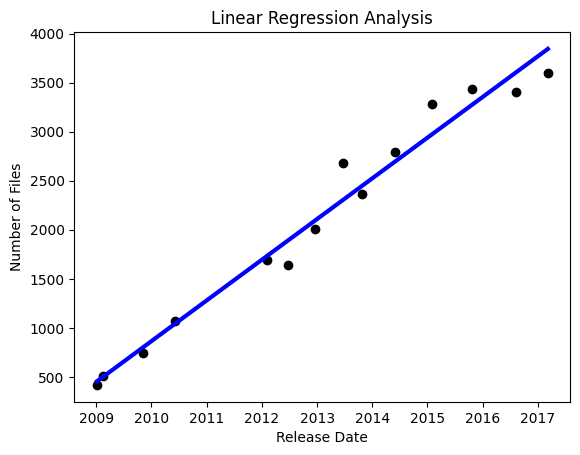

In [19]:
# I calculate the MSE because the package for the MRE is not working in my environment
from sklearn.metrics import mean_squared_error, r2_score

# Convert the release date to integers
df_b['date_int'] = df_b['date'].apply(lambda x: x.toordinal())

# Set number of files as the target variable
X = df_b[['date_int']]
y = df_b['nFiles']

# Apply linear regression analysis
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Calculate Mean Relative Error and adjusted R-squared metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Mean Squared Error: {mse:.3f}')
print(f'R-squared: {r2:.3f}')

# Generate a scatter plot showing the release dates against the total number of files
plt.scatter(df_b['date'], y, color='black')
plt.plot(df_b['date'], y_pred, color='blue', linewidth=3)

plt.xlabel('Release Date')
plt.ylabel('Number of Files')
plt.title('Linear Regression Analysis')

plt.show()

### Questions:

5. Choose an option regarding the growth of the software. Motivate your choice using the 2D regression plot.  
    a) Linear  
    b) Sub-linear  
    c) Super-linear  

Linear. The data points are close around the regression line and evenly distributed on both sides of the line, which means that the number of files increases linearly with time.

6. Report the MRE and ajusted R-squared values.

Mean Squared Error: 33038.789
R-squared: 0.972

### Fitting & forecasting

Using **Dataset A**, apply parametric regression models (e.g., linear, exponential, power, quadratic, logarithmic) to predict the number of files in software releases based on historical data.

**Steps:**

1. Prepare Data:
   - Convert "release_date" to datetime format.
   - Calculate "release_days" as the number of days since the earliest release.

2. Split Data:
   - Separate data into features (release days) and target variable (number of files).
   - Split data into training and testing sets from the earliest release up to a specific point.

3. Build and Train Models:
   - Define regression models.
   - Fit models to training data (maybe using `curve_fit` from SciPy).

4. Forecast Future Data:
   - Predict the number of files for future release days using trained models.

5. Visualize Results:
   - Plot original data and forecasted values for each regression model.

6. Evaluate Models:
   - Calculate adjusted R-squared and mean relative error for each model using training and test data.

In [20]:
# WRITE YOUR CODE HERE
# Convert "release_date" to datetime format
df_a['release_date'] = pd.to_datetime(df_a['release_date'])

# Calculate "release_days" as the number of days since the earliest release
df_a['release_days'] = (df_a['release_date'] - df_a['release_date'].min()).dt.days

df_a

/tmp/nix-shell.dAu2WN/ipykernel_13051/3259416583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['release_date'] = pd.to_datetime(df_a['release_date'])
/tmp/nix-shell.dAu2WN/ipykernel_13051/3259416583.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['release_days'] = (df_a['release_date'] - df_a['release_date'].min()).dt.days


,tag,code,blank,comment,nFiles,release_date,date,release_days
0,1.4,48551,8727,11154,419,2009-01-06,2009-01-06,0
1,1.5.0,63240,11018,18457,512,2009-02-18,2009-02-18,43
3,1.5.1,67939,11618,18131,600,2009-08-05,2009-08-05,211
4,1.5.2,68564,11555,11906,611,2009-08-17,2009-08-17,223
6,1.6.1,86799,14582,41327,744,2009-11-05,2009-11-05,303
9,2.0.0,115586,18488,42717,1074,2010-06-05,2010-06-05,515
10,2.0.1,115699,18492,42724,1074,2010-07-06,2010-07-06,546
21,3.0.0,188246,29836,60879,1694,2012-02-07,2012-02-07,1127
22,3.0.1,189022,29945,61587,1696,2012-03-12,2012-03-12,1161
26,3.1.0,191269,29973,62628,1642,2012-06-22,2012-06-22,1263


In [22]:
# WRITE YOUR CODE HERE

from sklearn.model_selection import train_test_split

# Separate data into features (release days) and target variable (number of files)
X = df_a[['release_days']]
y = df_a['nFiles']

# Split data into training and testing sets from the earliest release up to a specific point
# Let's say we want to use 80% of the data for training and the rest for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# WRITE YOUR CODE HERE
from scipy.optimize import curve_fit

# Define the form of the models
def linear_model(x, a, b):
    return a * x + b

def exponential_model(x, a, b):
    return a * np.exp(b * x)

def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit the models to the training data
popt_linear, pcov_linear = curve_fit(linear_model, X_train.squeeze(), y_train)
popt_exponential, pcov_exponential = curve_fit(exponential_model, X_train.squeeze(), y_train, p0=(1, 0.01))
popt_quadratic, pcov_quadratic = curve_fit(quadratic_model, X_train.squeeze(), y_train)

print("Linear model parameters: ", popt_linear)
print("Exponential model parameters: ", popt_exponential)
print("Quadratic model parameters: ", popt_quadratic)


Linear model parameters:  [  1.09246556 440.91431861]
Exponential model parameters:  [9.58836987e+02 4.63259981e-04]
Quadratic model parameters:  [-5.95697766e-05  1.27734508e+00  3.52186862e+02]


In [24]:
# WRITE YOUR CODE HERE

# Predict the number of files for future release days using trained models
y_pred_linear = linear_model(X_test.squeeze(), *popt_linear)
y_pred_exponential = exponential_model(X_test.squeeze(), *popt_exponential)
y_pred_quadratic = quadratic_model(X_test.squeeze(), *popt_quadratic)

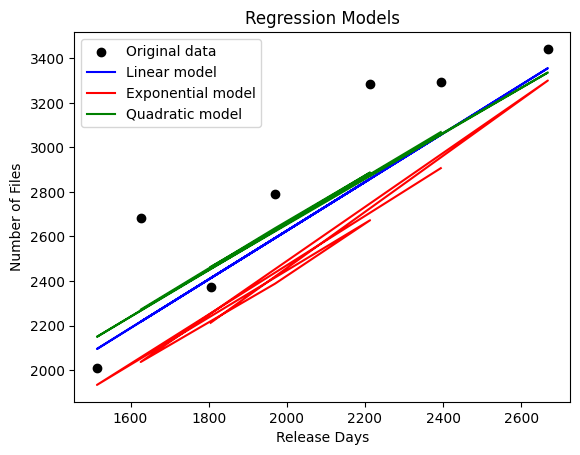

In [25]:
# WRITE YOUR CODE HERE

# Plot original data
plt.scatter(X_test, y_test, color='black', label='Original data')

# Plot forecasted values for each regression model
plt.plot(X_test, y_pred_linear, color='blue', label='Linear model')
plt.plot(X_test, y_pred_exponential, color='red', label='Exponential model')
plt.plot(X_test, y_pred_quadratic, color='green', label='Quadratic model')

plt.xlabel('Release Days')
plt.ylabel('Number of Files')
plt.title('Regression Models')
plt.legend()

plt.show()


In [26]:
# WRITE YOUR CODE HERE
# Calculate R-squared for each model
r2_linear = r2_score(y_test, y_pred_linear)
r2_exponential = r2_score(y_test, y_pred_exponential)
r2_quadratic = r2_score(y_test, y_pred_quadratic)

# Calculate Mean Relative Error for each model
mre_linear = np.mean(np.abs((y_test - y_pred_linear) / y_test))
mre_exponential = np.mean(np.abs((y_test - y_pred_exponential) / y_test))
mre_quadratic = np.mean(np.abs((y_test - y_pred_quadratic) / y_test))

print(f'Linear Model: R-squared = {r2_linear:.3f}, MRE = {mre_linear:.3f}')
print(f'Exponential Model: R-squared = {r2_exponential:.3f}, MRE = {mre_exponential:.3f}')
print(f'Quadratic Model: R-squared = {r2_quadratic:.3f}, MRE = {mre_quadratic:.3f}')

Linear Model: R-squared = 0.701, MRE = 0.076
Exponential Model: R-squared = 0.322, MRE = 0.119
Quadratic Model: R-squared = 0.742, MRE = 0.076


### Questions:

7. Which regression model do you prefer for assessing the goodness of fit, based on the evaluation metrics scores? Why?

The linear regression model has a good fit and is the simplest model. Using it, we have less chances of overfitting even though the quadratic model looks better in this case.

8. Which regression model do you prefer for assessing forecast accuracy, based on the evaluation metrics scores? Why?

The linear model would be a good choice because we saw that the growth is linear.

### Modify the CLOC parameters

Exclude all bank lines and verify if the Law of Increasing Growth applies after this filtering

/tmp/nix-shell.dAu2WN/ipykernel_13051/2911587751.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_a = df[df["tag"].str.contains(r'^v?[0-9]+\.[0-9]+(\.[0-9]+)?$', regex=True)]
/tmp/nix-shell.dAu2WN/ipykernel_13051/2911587751.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['date'] = pd.to_datetime(df_a['release_date'])


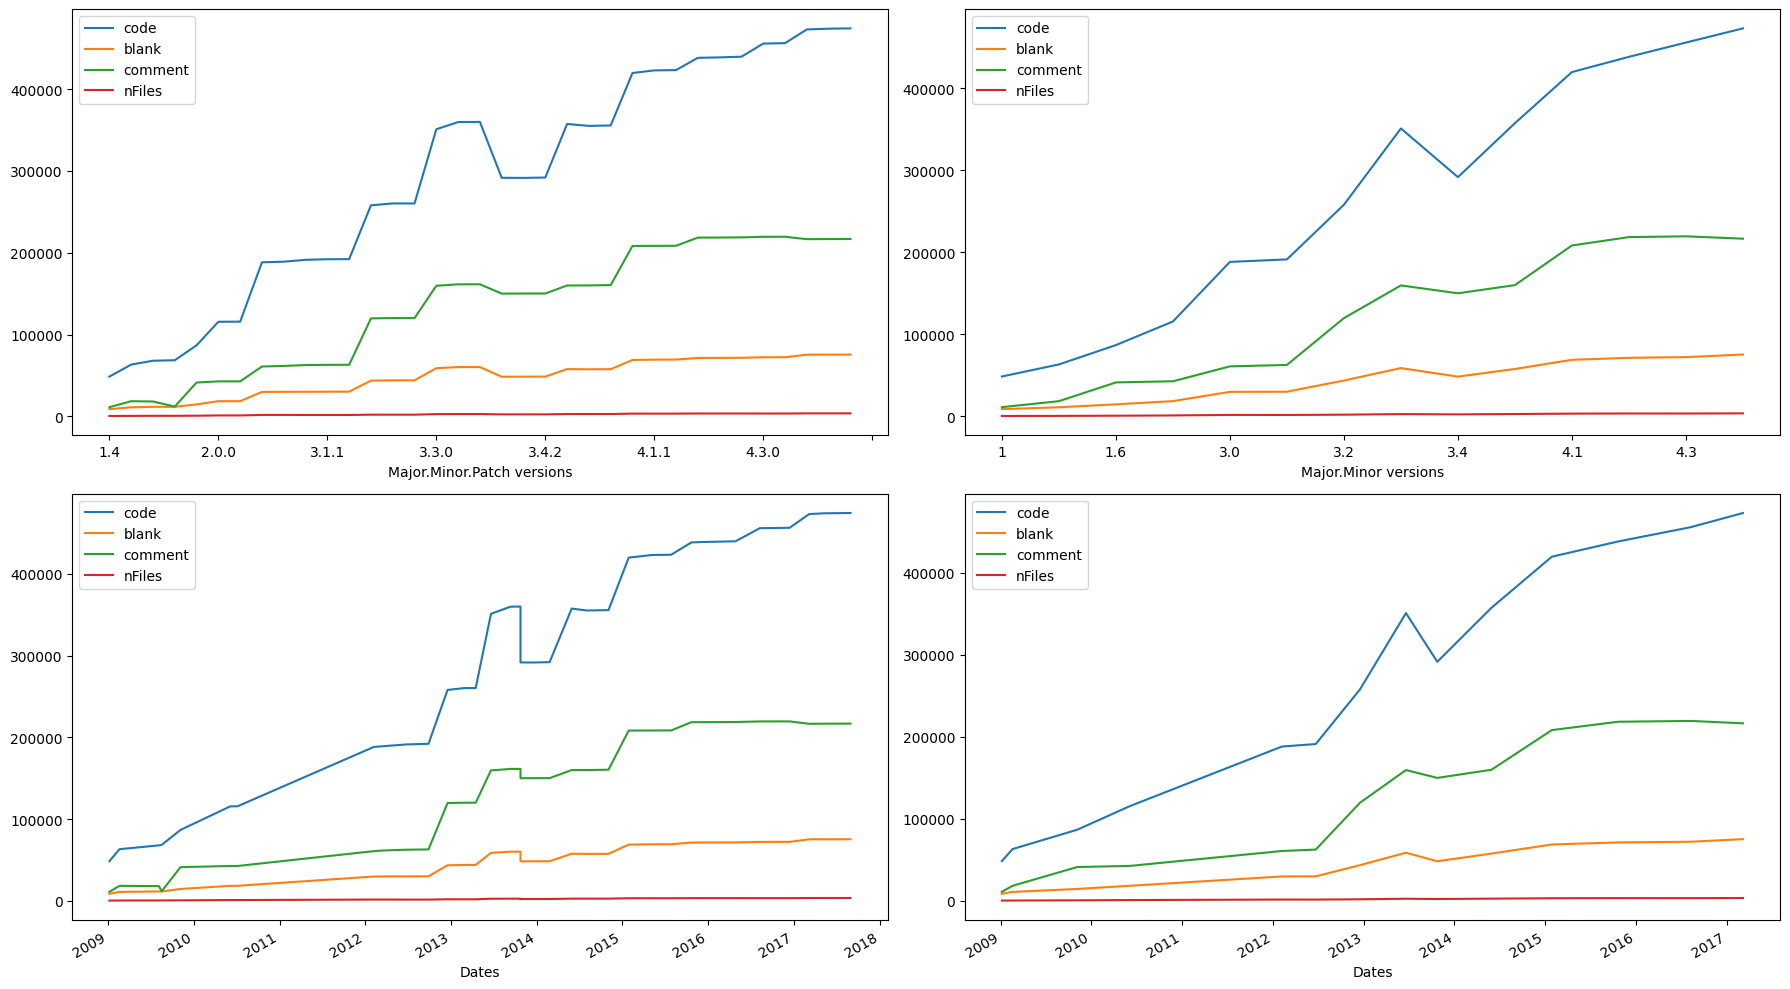

In [48]:
# WRITE YOUR CODE HERE
df = pd.read_csv('data/LawIncreasingGrowthDataset.csv')
df_a = df[df["tag"].str.contains(r'^v?[0-9]+\.[0-9]+(\.[0-9]+)?$', regex=True)]
df_b = df_a.copy()
df_b["tag"] = df_b["tag"].str.replace(r'\.[0-9]$', '', regex=True)
df_b.drop_duplicates(subset="tag", keep="first", inplace=True)

df_a['date'] = pd.to_datetime(df_a['release_date'])
df_b['date'] = pd.to_datetime(df_b['release_date'])

# Remove comments from the code
df_a['code'] = df_a['code'] - df_a['comments']
df_b['code'] = df_b['code'] - df_b['comments']

# Plotting code
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Plot for major.minor.patch format
df_a[['code', 'blank', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 0], legend=True)
df_a[['code', 'blank', 'nFiles', 'date']].plot(x='date', ax=axes[1, 0], legend=True)

axes[0, 0].set_xlabel('Major.Minor.Patch versions')
axes[1, 0].set_xlabel('Dates')

# Plot for major.minor format
df_b[['code', 'blank', 'comment', 'nFiles', 'tag']].plot(x='tag', ax=axes[0, 1], legend=True)
df_b[['code', 'blank', 'comment', 'nFiles', 'date']].plot(x='date', ax=axes[1, 1], legend=True)

axes[0, 1].set_xlabel('Major.Minor versions')
axes[1, 1].set_xlabel('Dates')

plt.tight_layout()
plt.show()

Exclude all comment lines and verify if the Law of Increasing Growth applies after this filtering

In [ ]:
# WRITE YOUR CODE HERE

## 3. Law of Continuing Change

### Dataset A : Major.Minor.Patch tag format

Import Dataset A that contains number of lines of code that are added, modified, removed and same between two consecutive tags for the three component versions (major.minor.patch)

In [38]:
# WRITE YOUR CODE HERE
df_a = pd.read_csv('data/LawContinuingChangeDatasetA.csv')
df_a

,first_tag,second_tag,added,same,modified,removed,date
0,1.4,1.5.0,2681,43708,2162,17370,2009-02-18
1,1.5.0,1.5.1,34218,25802,3220,38813,2009-08-05
2,1.5.1,1.5.2,18832,46583,2420,19665,2009-08-17
3,1.5.2,1.6.1,10056,50312,8300,28187,2009-11-05
4,1.6.1,2.0.0,24236,55784,6779,53023,2010-06-05
5,2.0.0,2.0.1,4,115527,55,117,2010-07-06
6,2.0.1,3.0.0,49353,56547,9799,121900,2012-02-07
7,3.0.0,3.0.1,34,188138,74,810,2012-03-12
8,3.0.1,3.1.0,9059,176395,3568,11306,2012-06-22
9,3.1.0,3.1.1,77,191025,167,834,2012-09-17


Create a plot displaying all features together. Show the outcomes with dates on the x-axis and the corresponding numbers on the y-axis.

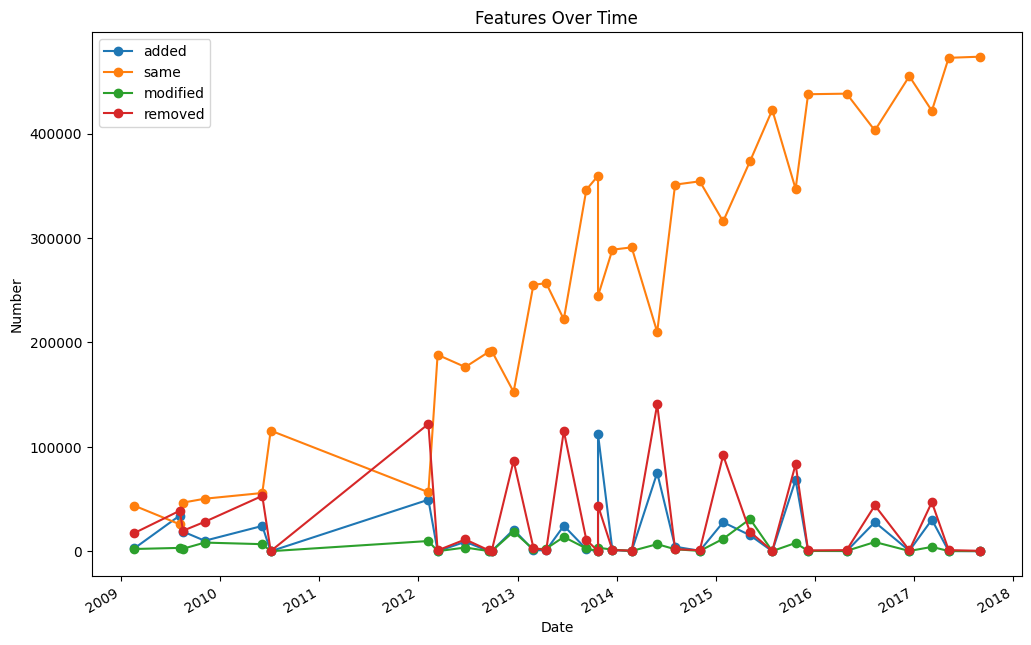

In [39]:
# WRITE YOUR CODE HERE
# Convert 'date' column to datetime
df_a['date'] = pd.to_datetime(df_a['date'])

# Set 'date' as index
df_a.set_index('date', inplace=True)

# Plot all features
df_a.plot(figsize=(12, 8), linestyle='-', marker='o')

plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Features Over Time')
plt.legend()
plt.show()


### Dataset B : Major.Minor tag format

Import Dataset B that contains number of lines of code that are added, modified, removed and same between two consecutive tags for the minor versions (major.minor)

In [43]:
# WRITE YOUR CODE HERE
df_b = pd.read_csv('data/LawContinuingChangeDatasetB.csv')
df_b

,first_tag,second_tag,added,same,modified,removed,date
0,1.4,1.5.0,2681,43708,2162,17370,2009-02-18
1,1.5.0,1.6.1,38753,21466,3021,62312,2009-11-05
2,1.6.1,2.0.0,24236,55784,6779,53023,2010-06-05
3,2.0.0,3.0.0,49339,56466,9781,121999,2012-02-07
4,3.0.0,3.1.0,9091,175549,3606,12114,2012-06-22
5,3.1.0,3.2.0,20765,151608,18896,87430,2012-12-17
6,3.2.0,3.3.0,25240,216618,16076,118220,2013-06-20
7,3.3.0,3.4.0,104598,242521,3795,45239,2013-10-24
8,3.4.0,4.0.0,75798,208717,7040,141618,2014-05-30
9,4.0.0,4.1.0,27544,318189,11642,89832,2015-01-28


Produce a plot where all features are represented together. Present the outcomes with dates on the x-axis and the corresponding numbers on the y-axis.

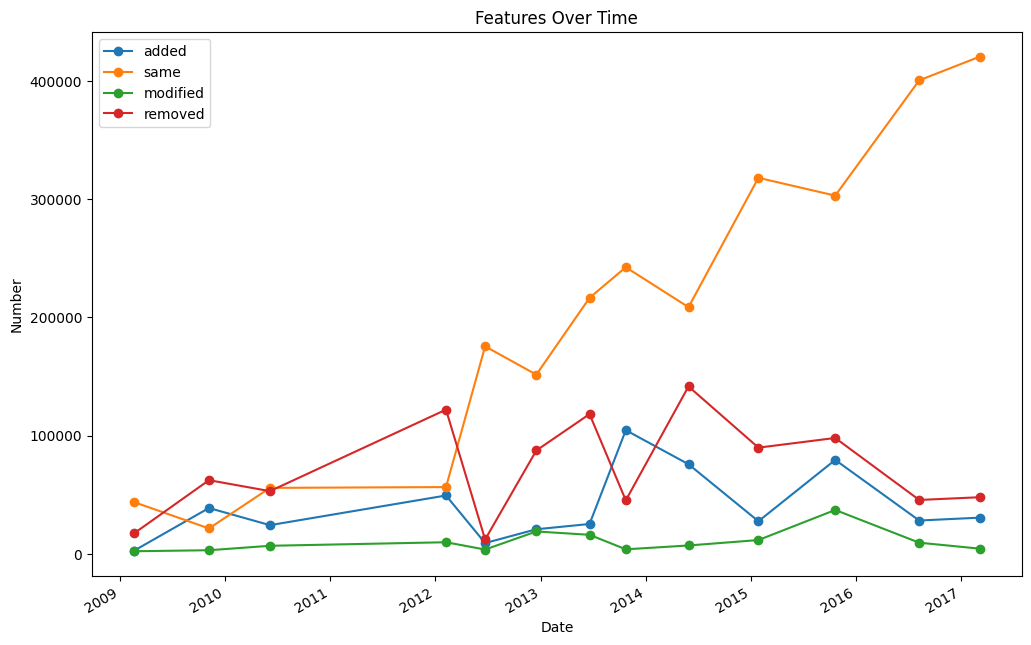

In [41]:
# WRITE YOUR CODE HERE
# Convert 'date' column to datetime
df_b['date'] = pd.to_datetime(df_b['date'])

# Set 'date' as index
df_b.set_index('date', inplace=True)

# Plot all features
df_b.plot(figsize=(12, 8), linestyle='-', marker='o')

plt.xlabel('Date')
plt.ylabel('Number')
plt.title('Features Over Time')
plt.legend()
plt.show()


### Question:

1. Do you find empirical support for the Law of Continuing Change ? Motivate your response.

Yes. We see that lines are continuously added, modified and deleted. This means that the software is continuously evolving.